# Loan Approval Prediction

# Objective:
### To predict a loan approval associated with each individual's likelihood of loan default or financial instability.

# Import Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

# About Data

The dataset includes the following columns:

* ApplicationDate: Loan application date
* Age: Applicant's age
* AnnualIncome: Yearly income
* CreditScore: Creditworthiness score
* EmploymentStatus: Job situation
* EducationLevel: Highest education attained
* Experience: Work experience
* LoanAmount: Requested loan size
* LoanDuration: Loan repayment period
* MaritalStatus: Applicant's marital state
* NumberOfDependents: Number of dependents
* HomeOwnershipStatus: Homeownership type
* MonthlyDebtPayments: Monthly debt obligations
* CreditCardUtilizationRate: Credit card usage percentage
* NumberOfOpenCreditLines: Active credit lines
* NumberOfCreditInquiries: Credit checks count
* DebtToIncomeRatio: Debt to income proportion
* BankruptcyHistory: Bankruptcy records
* LoanPurpose: Reason for loan
* PreviousLoanDefaults: Prior loan defaults
* PaymentHistory: Past payment behavior
* LengthOfCreditHistory: Credit history duration
* SavingsAccountBalance: Savings account amount
* CheckingAccountBalance: Checking account funds
* TotalAssets: Total owned assets
* TotalLiabilities: Total owed debts
* MonthlyIncome: Income per month
* UtilityBillsPaymentHistory: Utility payment record
* JobTenure: Job duration
* NetWorth: Total financial worth
* BaseInterestRate: Starting interest rate
* InterestRate: Applied interest rate
* MonthlyLoanPayment: Monthly loan payment
* TotalDebtToIncomeRatio: Total debt against income
* LoanApproved: Loan approval status
* RiskScore: Risk assessment score

In [110]:
data=pd.read_csv('Loan.csv')

In [111]:
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [115]:
data.iloc[5,:]

ApplicationDate                       2018-01-06
Age                                           37
AnnualIncome                              178310
CreditScore                                  626
EmploymentStatus                   Self-Employed
EducationLevel                            Master
Experience                                    16
LoanAmount                                 15433
LoanDuration                                  72
MaritalStatus                            Married
NumberOfDependents                             0
HomeOwnershipStatus                         Rent
MonthlyDebtPayments                          732
CreditCardUtilizationRate               0.102211
NumberOfOpenCreditLines                        5
NumberOfCreditInquiries                        1
DebtToIncomeRatio                       0.259366
BankruptcyHistory                              0
LoanPurpose                   Debt Consolidation
PreviousLoanDefaults                           1
PaymentHistory      

In [117]:
print(data.max())

ApplicationDate                2072-10-03
Age                                    80
AnnualIncome                       485341
CreditScore                           712
EmploymentStatus               Unemployed
EducationLevel                     Master
Experience                             61
LoanAmount                         184732
LoanDuration                          120
MaritalStatus                     Widowed
NumberOfDependents                      5
HomeOwnershipStatus                  Rent
MonthlyDebtPayments                  2919
CreditCardUtilizationRate         0.91738
NumberOfOpenCreditLines                13
NumberOfCreditInquiries                 7
DebtToIncomeRatio                0.902253
BankruptcyHistory                       1
LoanPurpose                         Other
PreviousLoanDefaults                    1
PaymentHistory                         45
LengthOfCreditHistory                  29
SavingsAccountBalance              200089
CheckingAccountBalance            

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

* There is no null values in this data

## Statistical information about numerical features

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


## Statistical information about categorical features 

In [49]:
data.describe(include='object').T

,count,unique,top,freq
ApplicationDate,20000,20000,2072-09-17,1
EmploymentStatus,20000,3,Employed,17036
EducationLevel,20000,5,Bachelor,6054
MaritalStatus,20000,4,Married,10041
HomeOwnershipStatus,20000,4,Mortgage,7939
LoanPurpose,20000,5,Home,5925


# Checking unique values

In [50]:
for i in data.columns:
    print(i,':',data[i].nunique())

ApplicationDate : 20000
Age : 63
AnnualIncome : 17516
CreditScore : 322
EmploymentStatus : 3
EducationLevel : 5
Experience : 62
LoanAmount : 15578
LoanDuration : 10
MaritalStatus : 4
NumberOfDependents : 6
HomeOwnershipStatus : 4
MonthlyDebtPayments : 1299
CreditCardUtilizationRate : 20000
NumberOfOpenCreditLines : 14
NumberOfCreditInquiries : 8
DebtToIncomeRatio : 20000
BankruptcyHistory : 2
LoanPurpose : 5
PreviousLoanDefaults : 2
PaymentHistory : 38
LengthOfCreditHistory : 29
SavingsAccountBalance : 9199
CheckingAccountBalance : 5151
TotalAssets : 18814
TotalLiabilities : 17163
MonthlyIncome : 17489
UtilityBillsPaymentHistory : 20000
JobTenure : 17
NetWorth : 17724
BaseInterestRate : 18742
InterestRate : 19999
MonthlyLoanPayment : 20000
TotalDebtToIncomeRatio : 20000
LoanApproved : 2
RiskScore : 73


# Convert application-date to datetime

In [51]:
data['ApplicationDate']=pd.to_datetime(data['ApplicationDate'])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   EmploymentStatus            20000 non-null  object        
 5   EducationLevel              20000 non-null  object        
 6   Experience                  20000 non-null  int64         
 7   LoanAmount                  20000 non-null  int64         
 8   LoanDuration                20000 non-null  int64         
 9   MaritalStatus               20000 non-null  object        
 10  NumberOfDependents          20000 non-null  int64         
 11  HomeOwnershipStatus         20000 non-null  object    

# Checking duplicates

In [53]:
data.duplicated().sum()

np.int64(0)

In [54]:
data.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

# Exploratory data analysis

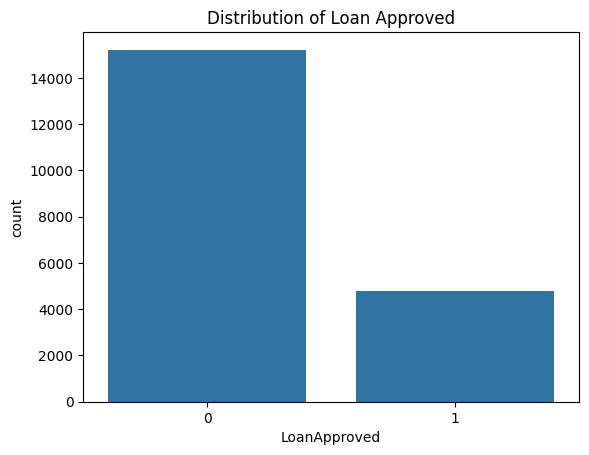

In [55]:
sns.countplot(x='LoanApproved',data=data)
plt.title('Distribution of Loan Approved')
plt.show()

In [56]:
data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

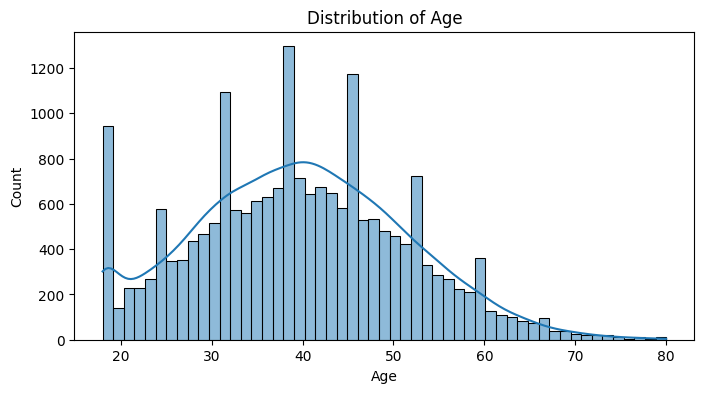

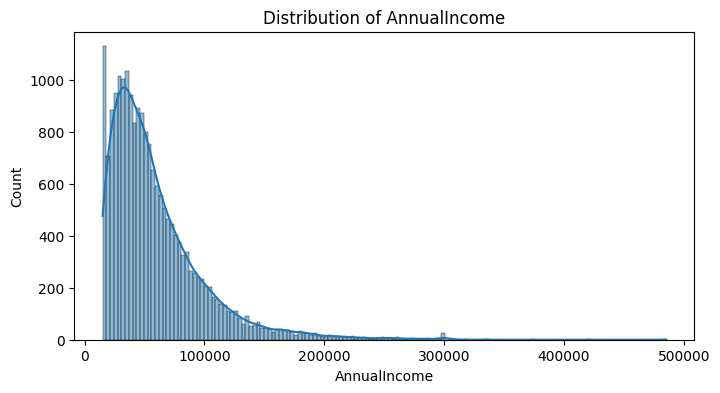

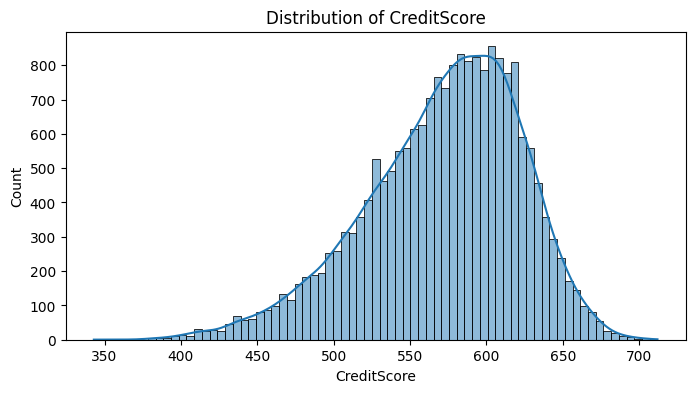

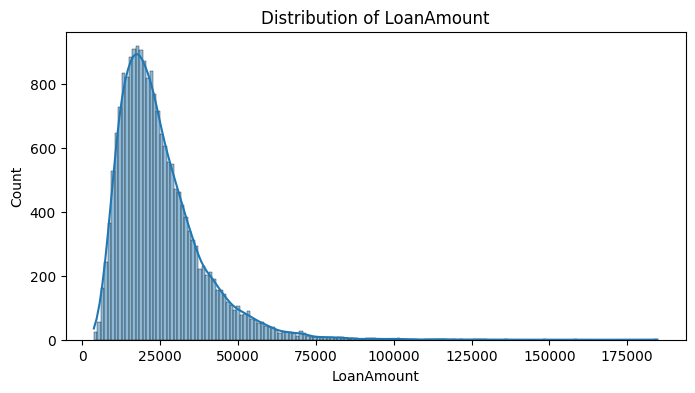

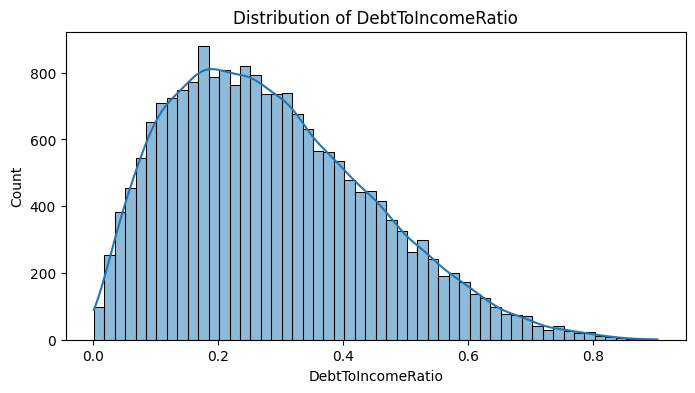

In [57]:
# Histogram for numerical features
numerical_features = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'DebtToIncomeRatio']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


## Age :
* The age values range from around 18 to approximately 80, with the majority of the data concentrated between 20 and 60.
* The highest frequency count is seen around the age of 40, where more than 1200 individuals fall within this age group.
* The distribution has a positive skew, as there are fewer individuals in the older age groups (60+). This means that as age increases, the frequency decreases gradually.


## Annual income :
* The distribution is heavily skewed to the right. 
* This means that most individuals have a relatively low to moderate annual income, while fewer individuals earn a very high income.
* The majority of the data is concentrated below 100000. 
* The distribution has a long tail extending up to 500,000. 
* Although there are individuals with high incomes, they represent a small proportion of the dataset, as shown by the decreasing frequency as income increases.

## Credit scores :
* The distribution of credit scores appears to be roughly bell-shaped, suggesting a normal distribution. 
* Most values are centered around the mean, with fewer occurrences on either side.
* The highest frequency of credit scores is centered around 600, indicating that this is likely the average or most common credit score in the dataset


## Loan amounts
* The distribution is right-skewed, meaning most loan amounts are concentrated on the lower end (closer to 0) with a long tail extending to the right. 
* The values range from around 0 to nearly 200,000. The concentration of values decreases rapidly as loan amounts increase, with few loans exceeding 75,000.
* The highest point (mode) of the distribution is between approximately 10,000 and 25,000, where most loan amounts lie.

## Debt-to-Income Ratio
* The distribution is right-skewed (positively skewed), though less so than the previous loan amount distribution. 
* It has a peak near the lower end and a gradual decline as the ratio increases.
* The highest frequency of Debt-to-Income Ratio values lies around 0.2, indicating that most individuals or cases have a ratio close to this value.
* The Debt-to-Income Ratio values range from 0.0 to around 0.8, with the majority falling between 0.1 and 0.5. 
* There are fewer instances as the ratio approaches higher values, which indicates fewer people have high debt relative to their income.



In [58]:
categorical_features = data.select_dtypes(include=['object']).columns

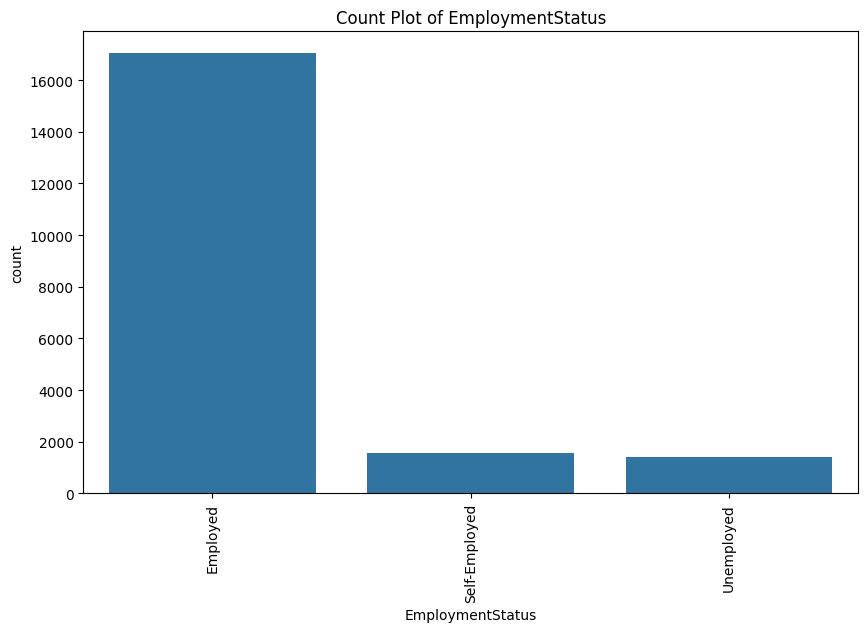

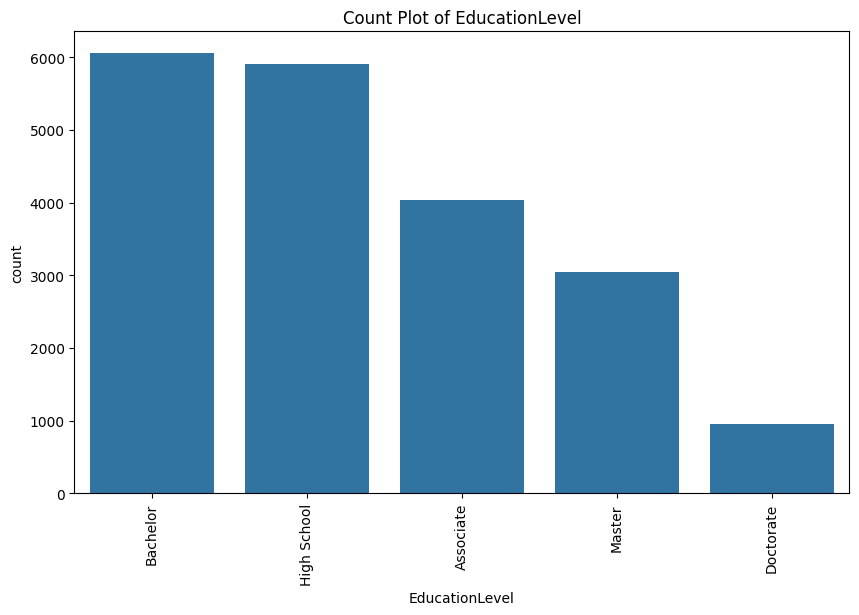

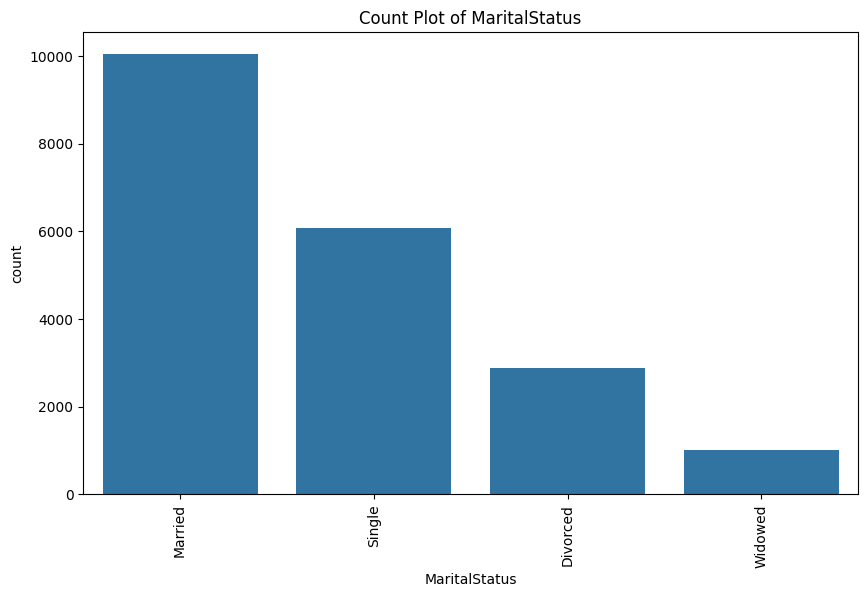

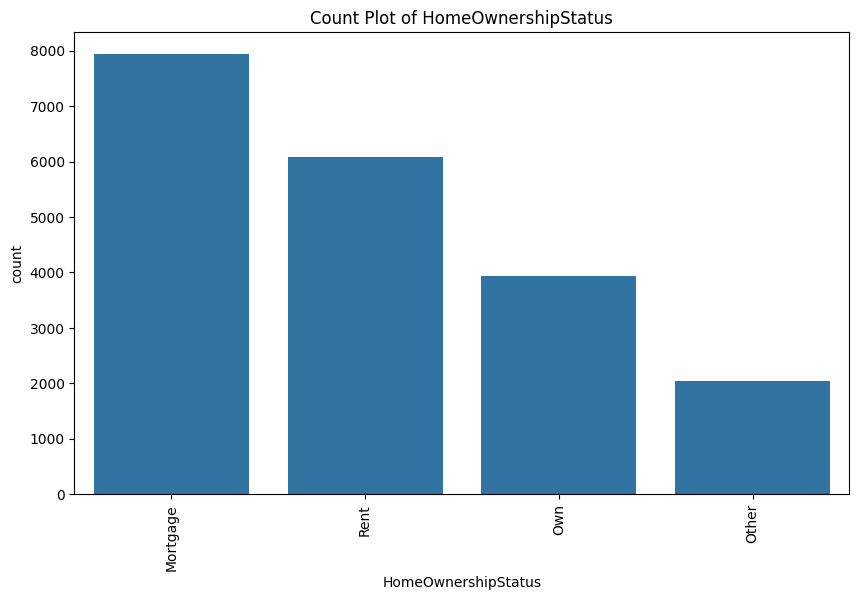

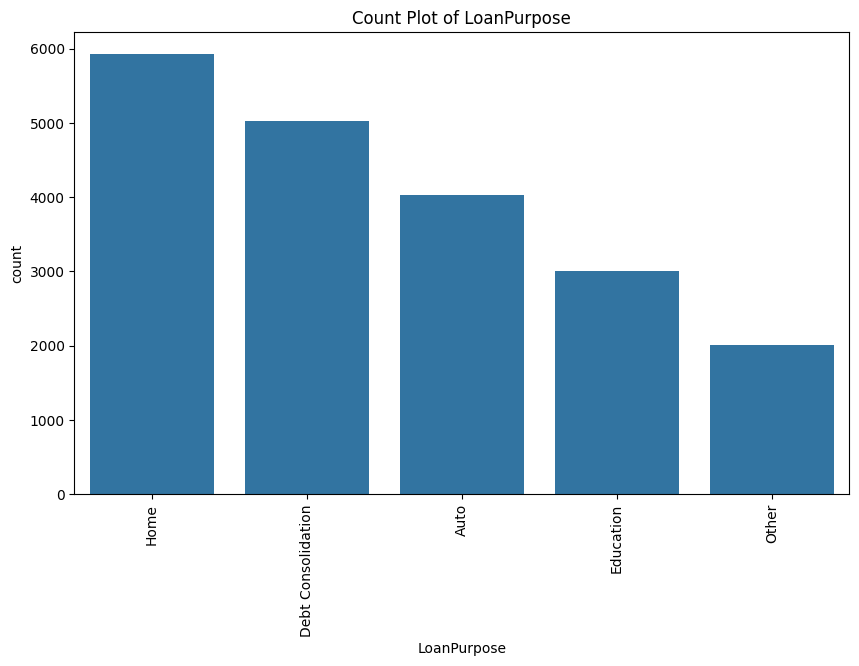

In [59]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, order=data[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=90)
    plt.show()

## Box plot to identify outliers

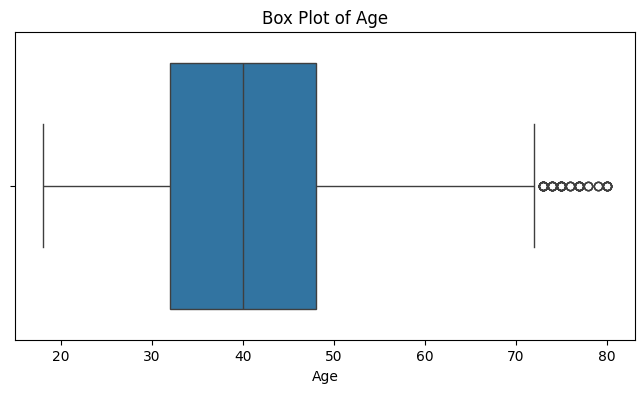

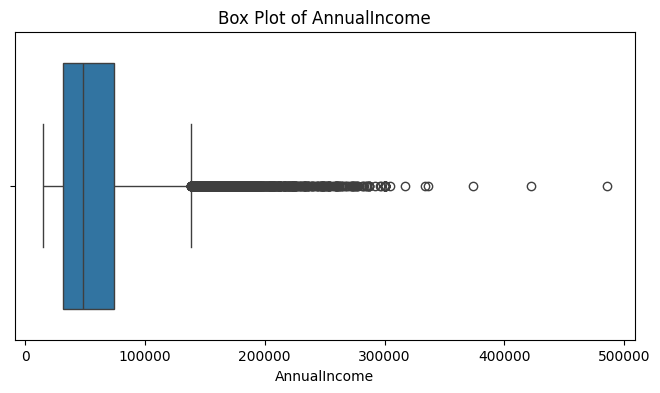

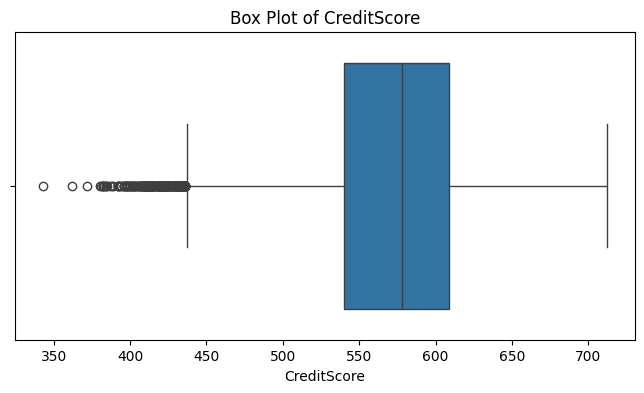

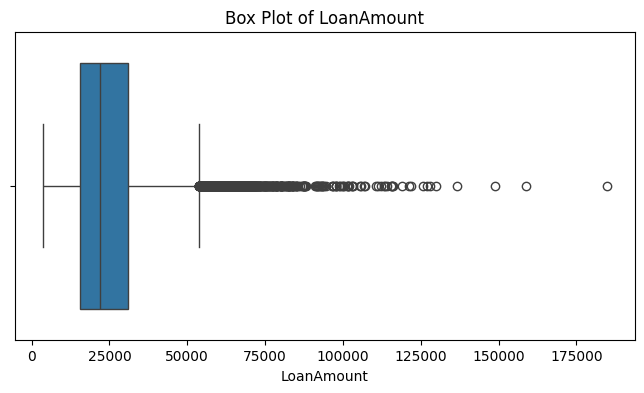

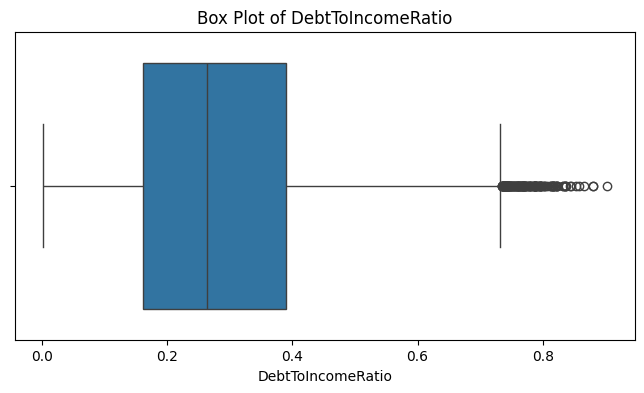

In [60]:

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=feature)
    plt.title(f'Box Plot of {feature}')
    plt.show()


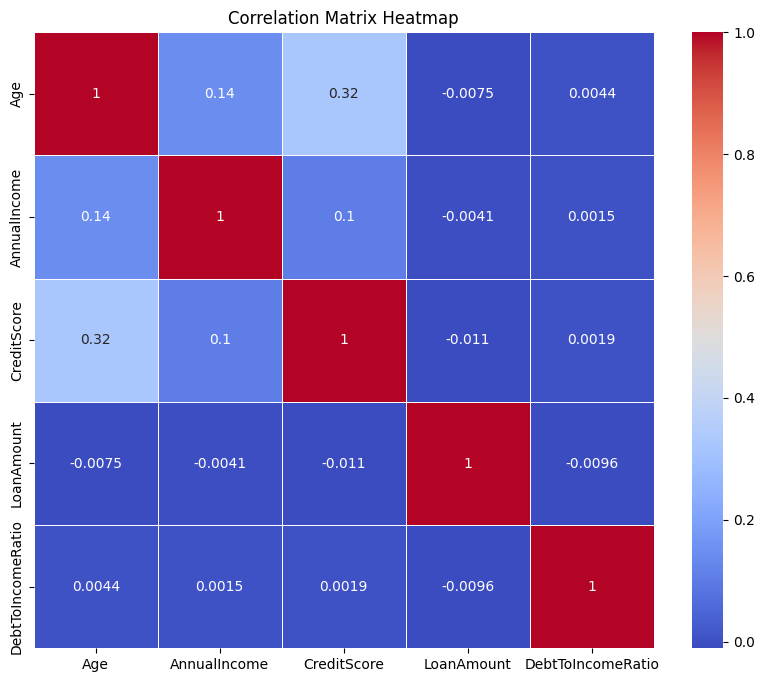

In [61]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


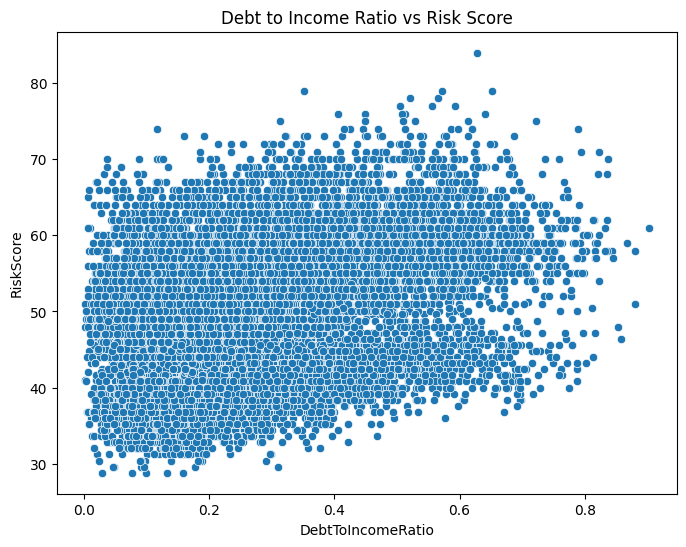

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='DebtToIncomeRatio', y='RiskScore')
plt.title('Debt to Income Ratio vs Risk Score')
plt.show()

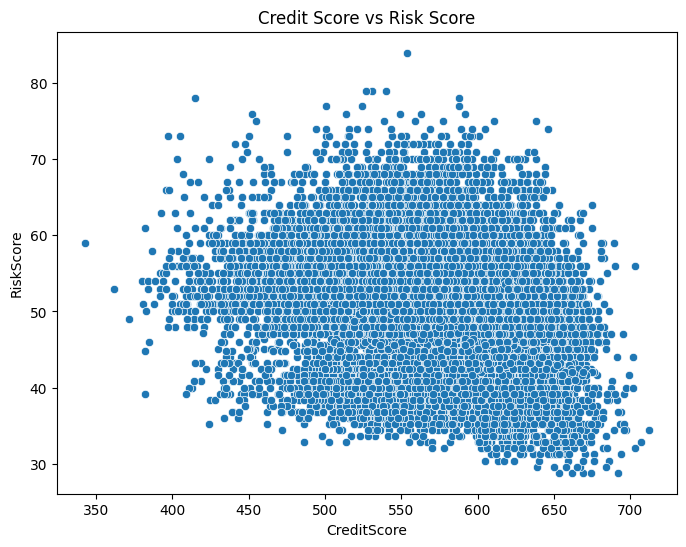

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='CreditScore', y='RiskScore')
plt.title('Credit Score vs Risk Score')
plt.show()


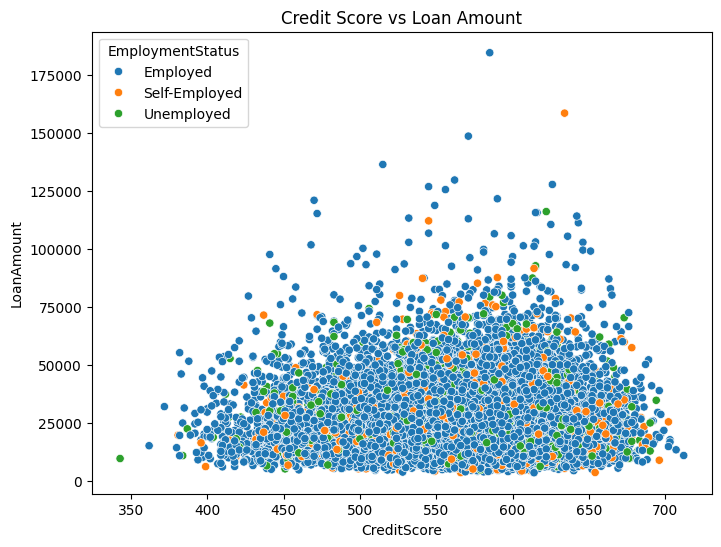

In [64]:
# Scatter plot for CreditScore vs. LoanAmount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='CreditScore', y='LoanAmount', hue='EmploymentStatus')
plt.title('Credit Score vs Loan Amount')
plt.show()


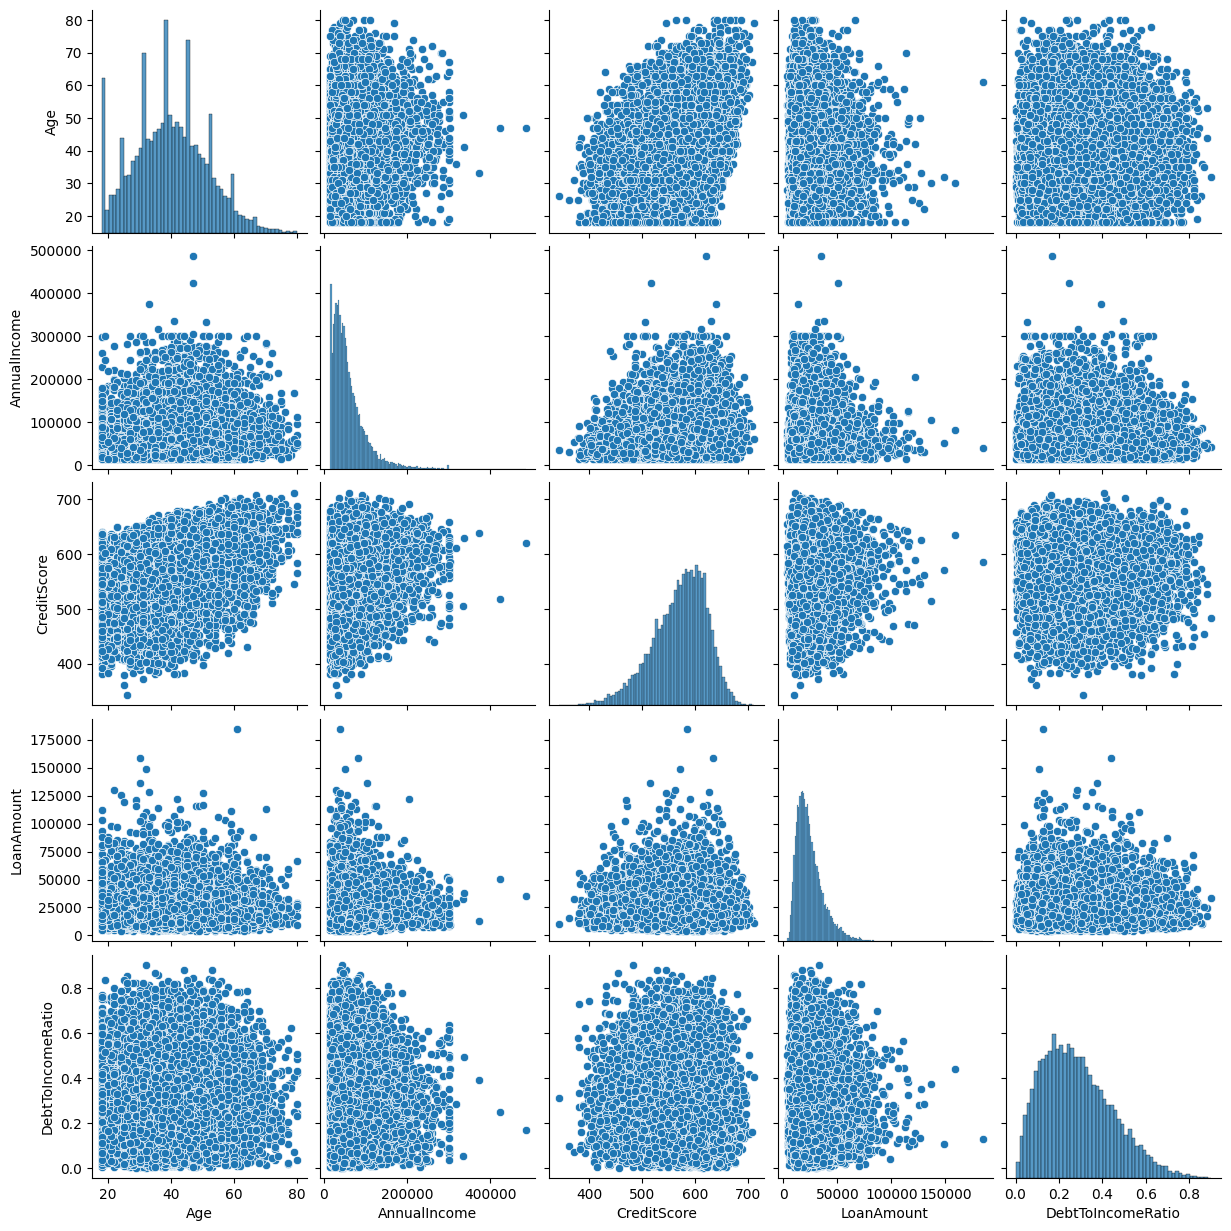

In [65]:
# Pair plot for numerical features
sns.pairplot(data[numerical_features])
plt.show()


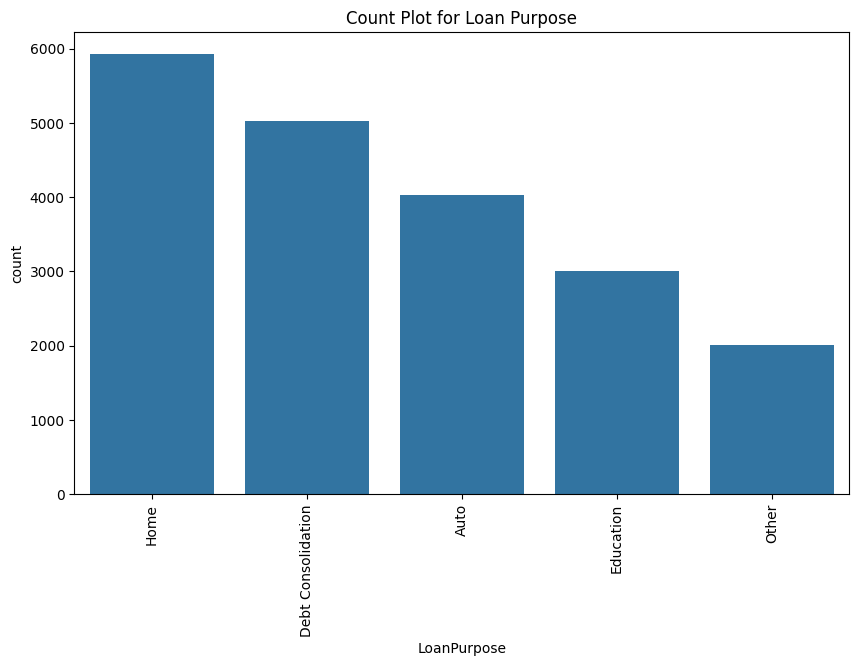

In [66]:

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='LoanPurpose', order=data['LoanPurpose'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count Plot for Loan Purpose')
plt.show()


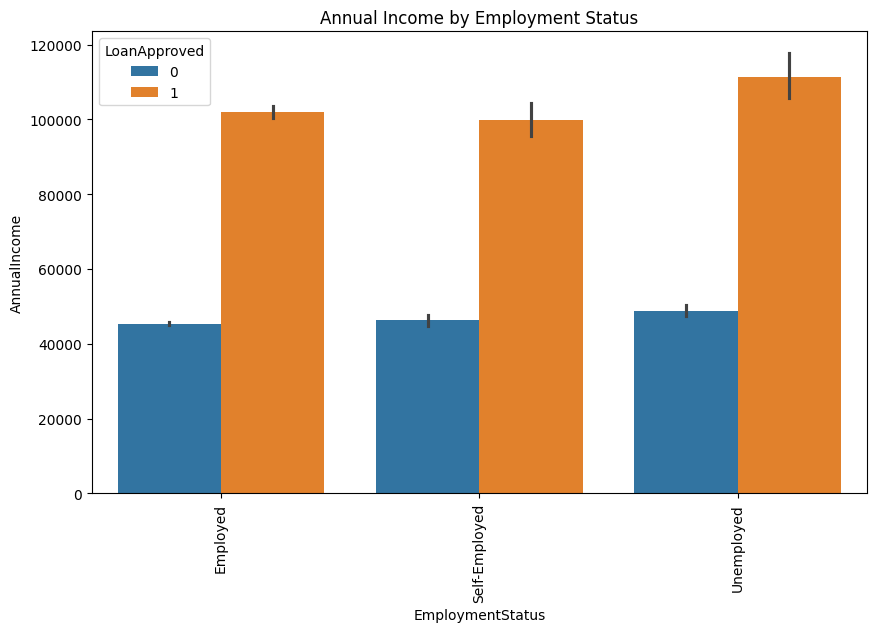

In [67]:

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='EmploymentStatus', y='AnnualIncome',hue='LoanApproved')
plt.xticks(rotation=90)
plt.title('Annual Income by Employment Status')
plt.show()


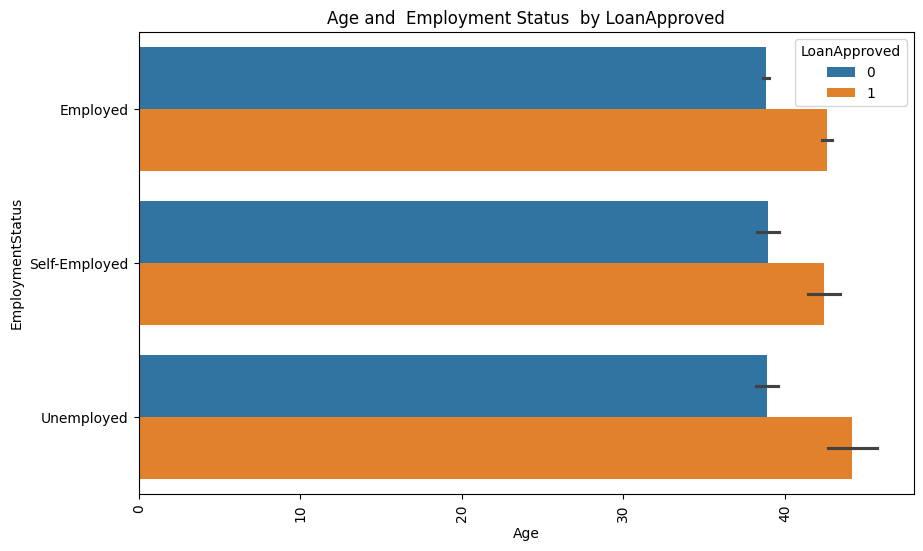

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age', y='EmploymentStatus',hue='LoanApproved')
plt.xticks(rotation=90)
plt.title('Age and  Employment Status  by LoanApproved')
plt.show()

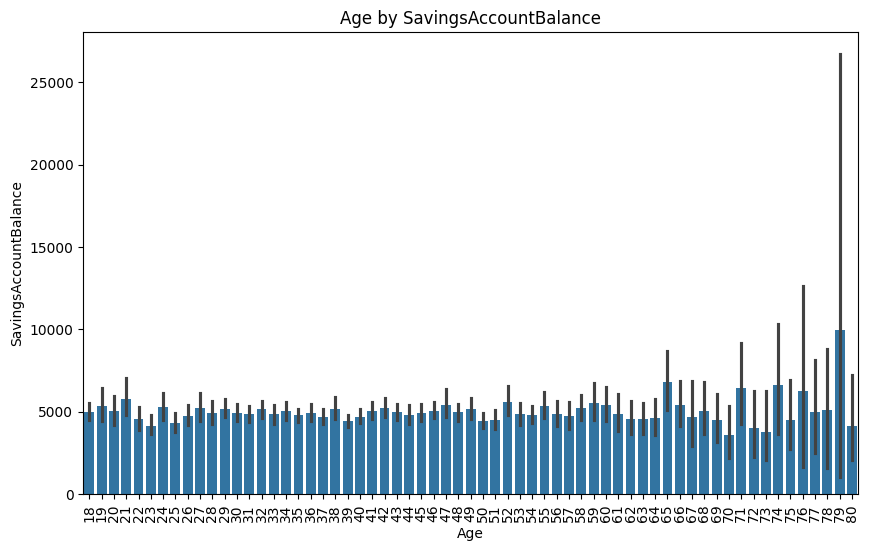

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age', y='SavingsAccountBalance')
plt.xticks(rotation=90)
plt.title('Age by SavingsAccountBalance')
plt.show()

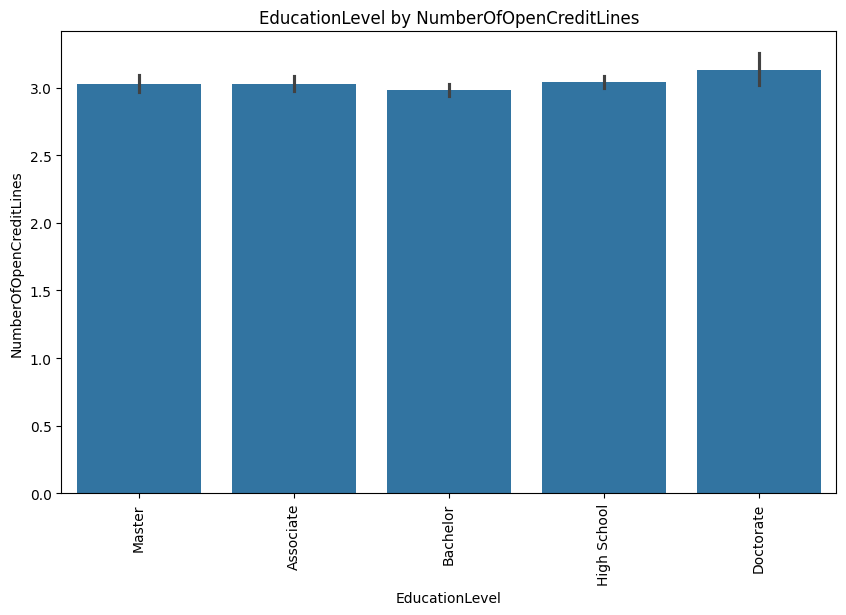

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='EducationLevel', y='NumberOfOpenCreditLines')
plt.xticks(rotation=90)
plt.title('EducationLevel by NumberOfOpenCreditLines')
plt.show()

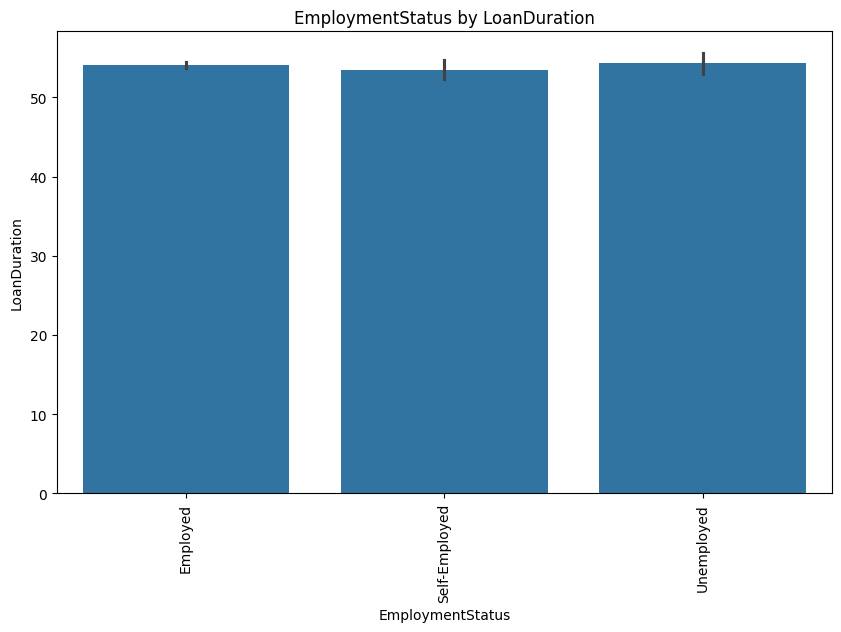

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='EmploymentStatus', y='LoanDuration')
plt.xticks(rotation=90)
plt.title('EmploymentStatus by LoanDuration')
plt.show()

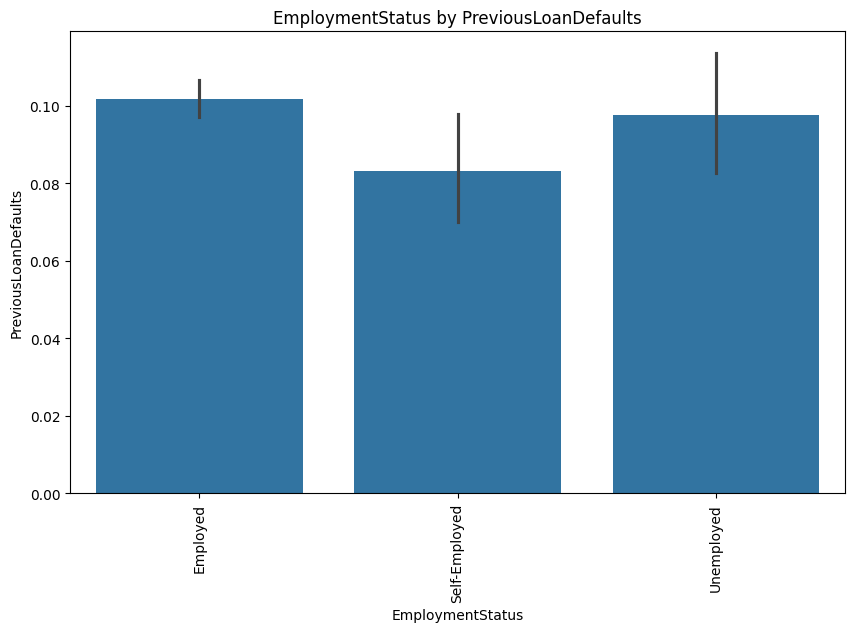

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='EmploymentStatus', y='PreviousLoanDefaults')
plt.xticks(rotation=90)
plt.title('EmploymentStatus by PreviousLoanDefaults')
plt.show()

In [73]:
data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [74]:
for i in categorical_features:
    print(i)
    print(data[i].unique())
    print("---------------------")

EmploymentStatus
['Employed' 'Self-Employed' 'Unemployed']
---------------------
EducationLevel
['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
---------------------
MaritalStatus
['Married' 'Single' 'Divorced' 'Widowed']
---------------------
HomeOwnershipStatus
['Own' 'Mortgage' 'Rent' 'Other']
---------------------
LoanPurpose
['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']
---------------------


# Model Building

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [76]:
data[categorical_features].nunique()

EmploymentStatus       3
EducationLevel         5
MaritalStatus          4
HomeOwnershipStatus    4
LoanPurpose            5
dtype: int64

# Categorical to Numerical 

In [77]:
categorical_features

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [78]:
# encoder=LabelEncoder()
# for i in categorical_features:
#     data[i]=encoder.fit_transform(data[i])

In [82]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(data[categorical_features])

# Transform training and new data
encoded_df= encoder.transform(data[categorical_features])
encoded_data = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(categorical_features))
encoded_columns=encoded_data.columns
# Drop the original categorical columns from the data
data = data.drop(columns=categorical_features)

# Concatenate the encoded features with the original DataFrame
data = pd.concat([data, encoded_data], axis=1)

In [83]:
data

,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,2018-01-01,45,39948,617,22,13152,48,2,183,0.354418,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2018-01-02,38,39709,628,15,26045,48,1,496,0.087827,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2018-01-03,47,40724,570,26,17627,36,2,902,0.137414,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2018-01-04,58,69084,545,34,37898,96,1,755,0.267587,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2018-01-05,37,103264,594,17,9184,36,1,274,0.320535,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,19,24521,36,3,673,0.101288,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
19996,2072-09-30,56,49246,567,33,25818,36,5,414,0.471818,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
19997,2072-10-01,44,48958,645,20,37033,72,3,512,0.216596,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19998,2072-10-02,60,41025,560,36,14760,72,3,986,0.364758,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [84]:
data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'Experience',
       'LoanAmount', 'LoanDuration', 'NumberOfDependents',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults',
       'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore',
       'EmploymentStatus_Employed', 'EmploymentStatus_Self-Employed',
       'EmploymentStatus_Unemployed', 'EducationLevel_Associate',
       'EducationLevel_Bachelor', 'EducationLevel_Doctorate',
       'EducationLevel_High School', 'EducationLevel_Master',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
   

In [85]:
y=data['LoanApproved']

In [86]:
x=data.drop(columns=['ApplicationDate','LoanApproved'],axis=1)

In [87]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42,shuffle=True)

In [89]:
x_train

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
13656,64,105600,533,43,16995,12,0,153,0.309678,1,...,0.0,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0000,0.000000
26012,21,58417,511,2,25478,67,0,644,0.136118,1,...,0.0,0.000000,0.0000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0000,0.000000
3860,34,121455,614,14,19627,60,3,404,0.034671,1,...,0.0,0.000000,0.0000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0000,0.000000
11134,42,47275,625,20,21531,108,0,481,0.192240,1,...,0.0,1.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000
27471,29,130989,569,7,29701,66,0,317,0.138285,5,...,0.0,0.120813,0.0000,0.879187,0.000000,0.000000,0.879187,0.120813,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,42,58092,635,19,8092,60,1,301,0.117361,3,...,0.0,0.928800,0.0712,0.000000,0.000000,0.000000,0.000000,0.928800,0.0712,0.000000
5390,31,48088,517,4,11381,120,0,464,0.230245,1,...,0.0,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0000,0.000000
860,42,15265,606,20,10643,60,1,298,0.574049,2,...,0.0,0.000000,0.0000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0000,0.000000
15795,37,45197,631,15,52646,36,1,298,0.538445,1,...,0.0,0.000000,0.0000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000


In [90]:
x_test.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
8978,47,88109,605,26,19554,72,3,342,0.193080,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0
25130,42,93313,533,18,9622,25,1,537,0.349317,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.133397,0.866603,0.0,0.0
17031,44,70159,588,24,27439,60,0,382,0.174548,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0
12381,68,41022,612,50,21078,36,1,412,0.133071,3,...,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0
14149,42,29378,599,17,17932,36,0,616,0.041525,4,...,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.000000,0.0,0.0


# Normalizing Data

In [91]:
scale=StandardScaler()
x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x.columns)
x_test=pd.DataFrame(scale.transform(x_test),columns=x.columns)

In [92]:
x_train.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,2.158124,0.661952,-0.888930,2.323938,-0.478608,-1.793492,-1.057071,-1.305222,0.159003,-1.144029,...,-0.239655,-0.875349,-0.346998,2.131230,-0.694766,-0.539507,-0.615695,-0.453953,1.637297,-0.342915
1,-1.803320,-0.321272,-1.347294,-1.538333,0.220478,0.644186,-1.057071,0.893600,-0.995108,-1.144029,...,-0.239655,-0.875349,-0.346998,-0.530636,1.625827,-0.539507,1.839434,-0.453953,-0.688113,-0.342915
2,-0.605674,0.992347,0.798685,-0.407912,-0.261704,0.333936,1.241098,-0.181181,-1.669690,-1.144029,...,-0.239655,-0.875349,-0.346998,-0.530636,1.625827,-0.539507,1.839434,-0.453953,-0.688113,-0.342915
3,0.131339,-0.553455,1.027867,0.157298,-0.104795,2.461363,-1.057071,0.163645,-0.621913,-1.144029,...,-0.239655,1.291535,-0.346998,-0.530636,-0.694766,2.099573,-0.615695,-0.453953,-0.688113,-0.342915
4,-1.066307,1.191022,-0.138879,-1.067324,0.568496,0.599864,-1.057071,-0.570789,-0.980693,1.295818,...,-0.239655,-0.613560,-0.346998,1.809642,-0.694766,-0.539507,1.542822,-0.097199,-0.688113,-0.342915


# Importing Model 

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
LG=LogisticRegression(penalty='l1',
    C=2.0, solver='liblinear')

In [95]:
LG.fit(x_train,y_train)

LogisticRegression(C=2.0, penalty='l1', solver='liblinear')

In [96]:
y_pred=LG.predict(x_test)

In [97]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [98]:
mae=mean_absolute_error(y_test,y_pred)
print(f'mean_absolute_error :',mae)
mse=mean_squared_error(y_test,y_pred)
print(f'mean_squared_error :',mse)
r2=r2_score(y_test,y_pred)
print(f'r2_score :',r2)


mean_absolute_error : 0.0008212877792378449
mean_squared_error : 0.0008212877792378449
r2_score : 0.9967148201650037


In [99]:
import pickle
# Save
with open('model.pkl', 'wb') as f:
    pickle.dump(LG, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scale, f)

# Load
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scale = pickle.load(f)

In [100]:
categorical_features

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [101]:
new_data = pd.DataFrame({
    'Age': [35],
    'AnnualIncome': [50000],
    'CreditScore': [700],
    'EmploymentStatus': ['Self-Employed'],
    'EducationLevel': ['Bachelor'],
    'Experience': [10],
    'LoanAmount': [15000],
    'LoanDuration': [36],
    'MaritalStatus': ['Married'],
    'NumberOfDependents': [2],
    'HomeOwnershipStatus': ['Mortgage'],
    'MonthlyDebtPayments': [1000],
    'CreditCardUtilizationRate': [30],
    'NumberOfOpenCreditLines': [5],
    'NumberOfCreditInquiries': [2],
    'DebtToIncomeRatio': [40],
    'BankruptcyHistory': [0],
    'LoanPurpose': ['Home'],
    'PreviousLoanDefaults': [0],
    'PaymentHistory': [90],
    'LengthOfCreditHistory': [15],
    'SavingsAccountBalance': [10000],
    'CheckingAccountBalance': [5000],
    'TotalAssets': [80000],
    'TotalLiabilities': [40000],
    'MonthlyIncome': [4000],
    'UtilityBillsPaymentHistory': [85],
    'JobTenure': [5],
    'NetWorth': [40000],
    'BaseInterestRate': [3.5],
    'InterestRate': [5.0],
    'MonthlyLoanPayment': [450],
    'TotalDebtToIncomeRatio': [45],
    'RiskScore': [700]
})


In [102]:
new_data

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,35,50000,700,Self-Employed,Bachelor,10,15000,36,Married,2,...,40000,4000,85,5,40000,3.5,5.0,450,45,700


In [103]:
categorical_features

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [104]:
# print(encoder.classes_)  # Check the categories the encoder knows
encoder.fit(new_data[categorical_features])
encoded_df= encoder.transform(new_data[categorical_features])
encoded_data = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(categorical_features))

In [105]:
# Optionally drop the original categorical column
new_data = new_data.drop(columns=categorical_features,axis=1)

# Concatenate the one-hot encoded columns
new_data = pd.concat([new_data, encoded_data], axis=1)


In [106]:
# Align new_data columns with the scaler's feature names
new_data = new_data.reindex(columns=scale.feature_names_in_, fill_value=0)
new_data_scaled = pd.DataFrame(scale.transform(new_data), columns=new_data.columns)
prediction = LG.predict(new_data_scaled)


In [107]:
new_data_scaled.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,-0.513548,-0.49667,2.590473,-0.784719,-0.643016,-0.729778,0.475042,2.487857,197.588913,1.295818,...,-0.239655,1.291535,-0.346998,-0.530636,-0.694766,-0.539507,-0.615695,-0.453953,1.637297,-0.342915


In [108]:
prediction

array([0])

In [109]:
if prediction[0] == 1:
    print("Loan Approved!")
else:
    print("Loan Rejected.")

Loan Rejected.
